# Depression Predictor

## Import packages

In [571]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

## Load data

In [572]:
data = pd.read_csv("b_depressed.csv")

## Take a quick look at the data structure

In [573]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [574]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [575]:
data.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


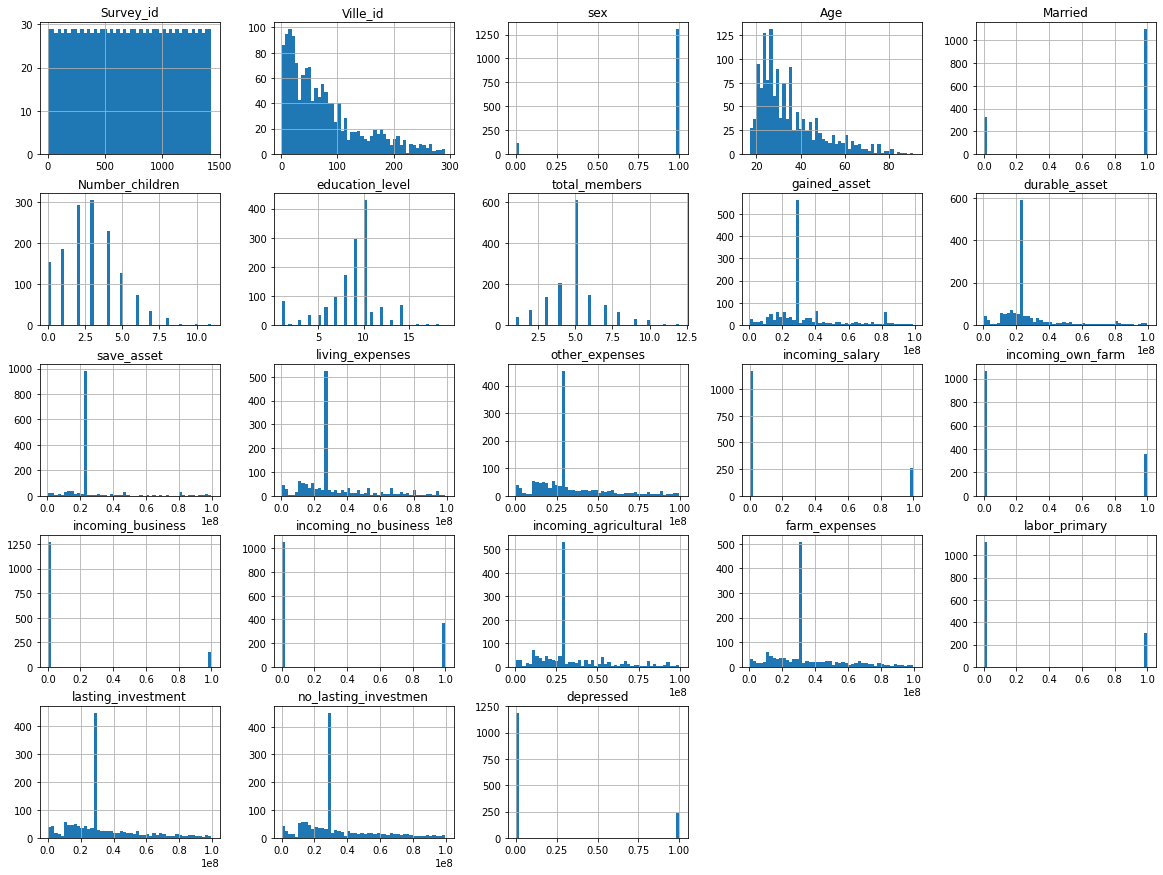

In [576]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## Set aside a test set

In [577]:
full_train_set, test_set = train_test_split(data, test_size=0.2, random_state=0, stratify=data['depressed'])
print(len(full_train_set), 'train istances +', len(test_set), 'test instances')

1143 train istances + 286 test instances


## Prepare the data for model training

In [578]:
attributes = [
    'sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members',
    'gained_asset','durable_asset','save_asset', 'living_expenses', 'other_expenses',
    'incoming_salary', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 
    'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen',
]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

pipeline = Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

full_train_X = pipeline.fit_transform(full_train_set)
full_train_y = np.array(full_train_set['depressed'])

# Over sampling under-represented class (depressed) by SMOTE
# smote = SMOTE(random_state=0)
# full_train_X, full_train_y = smote.fit_resample(full_train_X, full_train_y)

## Train, select and fine-tune a model

In [579]:
# Choose and config a model
model_hyper_parameters = {
    'decision-tree': {
        'random_state': 0,
        'max_depth': 6,
        'min_samples_split': 10,
        'min_samples_leaf': 5,
    },
    'svm': {
        'random_state': 0,
        'kernel': 'poly',
        'degree': 10,
        'probability': True,
    },
    'knn': {
        'n_neighbors': list(range(1, 250, 5)),
    },
    'gradient-boosting': {
        'random_state': 0,
        'n_estimators': 25,
        'max_depth': 2,
        'min_samples_split': 10,
        'min_samples_leaf': 5,
        'subsample': 0.72,
        'max_features': 'sqrt',
    },
    'ada-boost': {
        'random_state': 0,
        'n_estimators': 8,
        'base_estimator': {
            'max_depth': 1,
            'min_samples_split': 10,
            'min_samples_leaf': 5,
            'max_features': 'sqrt',
        },
    },
}
model_name = 'ada-boost'

In [580]:
def fit_and_validate_model(model_name):
    # Construct the model
    if model_name == 'decision-tree':
        clf = DecisionTreeClassifier(**model_hyper_parameters[model_name])
    elif model_name == 'svm':
        clf = SVC(**model_hyper_parameters[model_name])
    elif model_name == 'knn':
        clf = GridSearchCV(
            KNeighborsClassifier(),
            model_hyper_parameters[model_name],
            scoring='roc_auc',
            return_train_score=True,
        )
    elif model_name == 'gradient-boosting':
        clf = GradientBoostingClassifier(**model_hyper_parameters[model_name])
    elif model_name == 'ada-boost':
        base_estimator = DecisionTreeClassifier(**model_hyper_parameters[model_name]['base_estimator'])
        del model_hyper_parameters[model_name]['base_estimator']
        clf = AdaBoostClassifier(base_estimator=base_estimator, **model_hyper_parameters[model_name])
    else:
        raise ValueError('Invalid model specified!')
    
    # K-fold cross validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    train_aucs, validation_aucs = [], []
    for train_index, validation_index in skf.split(full_train_X, full_train_y):
        train_X, validation_X = full_train_X[train_index], full_train_X[validation_index]
        train_y, validation_y = full_train_y[train_index], full_train_y[validation_index]
        # Fit the model
        clf.fit(train_X, train_y)
        # Calculate train AUC
        pred_proba = clf.predict_proba(train_X)
        train_aucs.append(roc_auc_score(train_y, pred_proba[:, 1]))
        # Calculate validation AUC
        pred_proba = clf.predict_proba(validation_X)
        validation_aucs.append(roc_auc_score(validation_y, pred_proba[:, 1]))
    
    mean_train_auc = np.mean(train_aucs)
    mean_validation_auc = np.mean(validation_aucs)
    
    return clf, mean_train_auc, mean_validation_auc

# Fit and validate model
clf, mean_train_auc, mean_validation_auc = fit_and_validate_model(model_name)

# Print metrics and plot ROC on train set
print('Mean train AUC: {}'.format(mean_train_auc))

# Print metrics and plot ROC on validation set
print('Mean validation AUC: {}'.format(mean_validation_auc))

Mean train AUC: 0.6593716828370862
Mean validation AUC: 0.5663537149569985


In [581]:
# Print tree depth, number of leaves and plot decision tree
if model_name == 'decision-tree':
    print(clf.get_depth(), clf.get_n_leaves())
    tree.plot_tree(clf)
# Plot metrics on different k's
elif model_name == 'knn':
    # print('Best validation AUC: {}'.format(clf.best_score_))
    print('Best k: {}'.format(clf.best_params_))
    ks = [param['n_neighbors'] for param in clf.cv_results_['params']]
    train_scores = clf.cv_results_['mean_train_score']
    validation_scores = clf.cv_results_['mean_test_score']
    plt.plot(ks, train_scores, label='train')
    plt.plot(ks, validation_scores, label='validation')
    plt.legend(loc="upper right")
    plt.xlabel('k')
    plt.ylabel('Mean AUC from cross validation')

## Evaluate the final model on the test set

In [582]:
# Predict on test set
test_X = pipeline.transform(test_set)
test_y = np.array(test_set['depressed'])
pred_y = clf.predict(test_X)
pred_proba = clf.predict_proba(test_X)

Accuracy: 0.8356643356643356
AUC of ROC: 0.5168942577030813


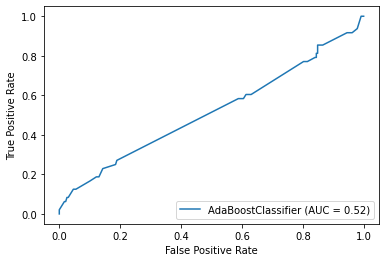

In [583]:
# Evaluate on test set
print('Accuracy: {}'.format(accuracy_score(test_y, pred_y)))
print('AUC of ROC: {}'.format(roc_auc_score(test_y, pred_proba[:, 1])))
plot_roc_curve(clf, test_X, test_y)